In [18]:
#Import Modules
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import sklearn.svm as svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


In [23]:
#Download Dataset from Kaggle
path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")
dataset = pd.read_csv(f"{path}/heart.csv")

In [25]:
#Dataset Preprocessing

label = LabelEncoder()
scaler = StandardScaler()

dataset.dropna(inplace=True)
dataset.drop_duplicates(inplace=True)

X = dataset.drop(columns=['target'])
y = dataset['target']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)
train_y = label.fit_transform(train_y)
test_y = label.transform(test_y)

In [26]:
#Model Training
model = svm.SVC()
model.fit(train_X, train_y)
pred_y = model.predict(test_X)

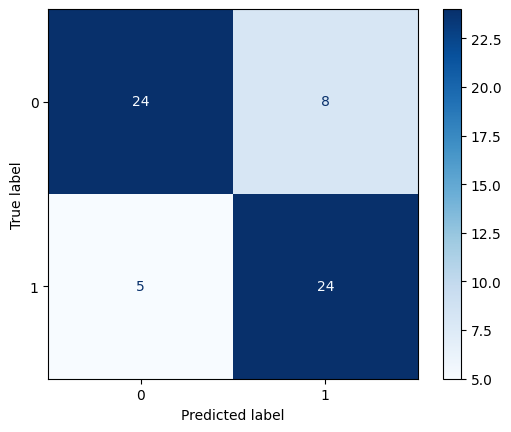

In [27]:
#Confusion Matrix
cm = confusion_matrix(test_y, pred_y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')